In [1]:
import osmnx as ox
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon

In [2]:
# osmnx.geometries.geometries_from_bbox(north, south, east, west, tags)
# https://www.mapsdirections.info/pt/coordenadas-gps.html
# ANALISANDO CIDADE DE PATOS - PB
north = -6.9875
west = -37.3303
south = -7.0882
east = -37.2215
pois = ox.geometries.geometries_from_bbox(north, south, east, west, tags={'amenity':True})
pois = pd.DataFrame(pois)
pois.reset_index(inplace=True)
pois = pois[['element_type', 'osmid', 'amenity', 'name', 'geometry', 'opening_hours']]
pois.head()

,element_type,osmid,amenity,name,geometry,opening_hours
0,node,1798496605,fuel,Posto Viola,POINT (-37.27847 -7.02390),NaN
1,node,1798496642,taxi,Moto táxi Praça dos Pombos,POINT (-37.27843 -7.02361),NaN
2,node,1798525769,taxi,Táxi Rodoviária Velha,POINT (-37.27735 -7.02265),NaN
3,node,1798525772,taxi,Táxi Fórum Miguel Sátiro,POINT (-37.27702 -7.02601),NaN
4,node,1798919196,bar,Bar do Rock,POINT (-37.27702 -7.02204),We-Su 19:00-02:00+; week 25-26 18:00-04:00


In [3]:
pois[pois.geometry.apply(type).apply(str)=="<class 'shapely.geometry.polygon.Polygon'>"]

,element_type,osmid,amenity,name,geometry,opening_hours
640,way,165773628,parking,NaN,"POLYGON ((-37.30354 -7.00531, -37.30316 -7.005...",NaN
641,way,166259294,place_of_worship,NaN,"POLYGON ((-37.30145 -7.00646, -37.30139 -7.006...",NaN
642,way,166259767,parking,NaN,"POLYGON ((-37.30149 -7.00651, -37.30200 -7.006...",NaN
643,way,166429876,place_of_worship,Paróquia Nossa Senhora Das Neves,"POLYGON ((-37.30090 -7.03673, -37.30082 -7.037...",NaN
644,way,166550089,college,IFPB - Campus Patos,"POLYGON ((-37.28455 -7.07763, -37.28672 -7.076...",Su-Fr 07:00-22:00; week 01 off; week 53 off; S...
...,...,...,...,...,...,...
824,way,1084925006,place_of_worship,NaN,"POLYGON ((-37.27436 -7.00392, -37.27443 -7.003...",NaN
825,way,1085721565,place_of_worship,Capela da Cruz da Menina,"POLYGON ((-37.30224 -7.00568, -37.30223 -7.005...",NaN
826,way,1098137716,school,NaN,"POLYGON ((-37.27944 -7.06101, -37.27924 -7.060...",NaN
827,way,1112595201,place_of_worship,NaN,"POLYGON ((-37.23823 -7.06129, -37.23823 -7.061...",NaN


<class 'shapely.geometry.polygon.Polygon'>


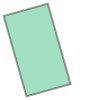

In [4]:
polygon_paroquia_nossa_senhora_das_neves = pois[pois['osmid']==166429876]['geometry'].values[0]
print(type(polygon_paroquia_nossa_senhora_das_neves))
polygon_paroquia_nossa_senhora_das_neves

In [5]:
pd.set_option('display.max_columns', 500)
pois[pois['name']=='Santander']

,element_type,osmid,amenity,name,geometry,opening_hours
15,node,1801176616,bank,Santander,POINT (-37.27588 -7.02915),Mo-Su 06:00-22:00
49,node,1812941830,atm,Santander,POINT (-37.27959 -7.02079),NaN


In [6]:
geoms = ox.geometries.geometries_from_bbox(north, south, east, west, tags={'highway':True, 'place':True, 'name':True})
geoms = pd.DataFrame(geoms)
geoms.reset_index(inplace=True)

In [7]:
def is_street(string):
    string = str(string)
    return string.startswith('Rua') or string.startswith('Travessa') or string.startswith('Avenida')

ruas = geoms[geoms['name'].apply(is_street)==True]
ruas = ruas[['element_type', 'osmid', 'geometry', 'highway', 'maxspeed', 'name']]

In [8]:
ruas.head()

,element_type,osmid,geometry,highway,maxspeed,name
1563,way,54690571,"LINESTRING (-37.29267 -7.03183, -37.29355 -7.0...",primary,50,Rua do Prado
1564,way,61579255,"LINESTRING (-37.27112 -7.01758, -37.27074 -7.0...",secondary,NaN,Avenida Lima Campos
1580,way,165774623,"LINESTRING (-37.30149 -7.00534, -37.30040 -7.0...",residential,NaN,Rua Severina Dantas
1581,way,165774624,"LINESTRING (-37.30190 -7.00594, -37.30081 -7.0...",residential,NaN,Rua Iremar Belarmino
1582,way,165774625,"LINESTRING (-37.30121 -7.00490, -37.30129 -7.0...",residential,NaN,Rua Antônio Crisanto Dantas


In [9]:
bairros = geoms.loc[(geoms['place'] == 'neighbourhood') | (geoms['place'] == 'suburb')]
bairros = bairros[bairros.geometry.apply(type).apply(str)=="<class 'shapely.geometry.polygon.Polygon'>"]
bairros = bairros[['element_type', 'osmid', 'geometry', 'name', 'place', 'ways', 'type']]

In [10]:
bairros.head()

,element_type,osmid,geometry,name,place,ways,type
6189,relation,3819334,"POLYGON ((-37.28270 -7.05786, -37.28186 -7.057...",Santa Cecília,suburb,"[427104529, 171543543, 427104517, 171543546, 8...",boundary
6190,relation,4141969,"POLYGON ((-37.28372 -7.02427, -37.28268 -7.024...",Centro,suburb,"[528484442, 170491140, 525677008, 525677007, 5...",boundary
6191,relation,4485256,"POLYGON ((-37.28158 -7.05318, -37.28147 -7.052...",Jatobá,suburb,"[871208879, 871208878, 171543546, 427104517, 1...",boundary
6192,relation,4601772,"POLYGON ((-37.28307 -7.06504, -37.28304 -7.065...",Alto da Tubiba,suburb,"[169735160, 169734332, 427104540, 421411824, 3...",boundary
6193,relation,4601773,"POLYGON ((-37.26246 -7.01933, -37.26219 -7.019...",Ana Leite,suburb,"[435034545, 435034543, 435034547, 277363873, 3...",boundary


In [11]:
# QUANTIDADE ENCONTRADA DE DIFERENTES TIPOS DE POI
pois.amenity.value_counts().shape

(60,)

In [12]:
# SAMPLE CODE
# G = ox.graph_from_place('Centro, Patos, Paraíba, Brazil', network_type='drive')
# G = ox.project_graph(G)

In [13]:
# SAMPLE CODE
# import matplotlib.pyplot as plt
# import osmnx as ox
# ox.config(use_cache=True, log_console=True)

# G = ox.graph_from_address('Centro, Patos, Paraíba, Brazil', dist=200, network_type='drive')
# G = ox.get_undirected(G)

# fig, ax = ox.plot_graph(G, bgcolor='k', edge_linewidth=3, node_size=0,
#                         show=False, close=False)
# for _, edge in ox.graph_to_gdfs(G, nodes=False).fillna('').iterrows():
#     c = edge['geometry'].centroid
#     text = edge['name']
#     ax.annotate(text, (c.x, c.y), c='w')
# plt.show()

# python MY_SCRIPT.py >/dev/null &

In [14]:
# SAMPLE CODE
nodes = [Point(1, 1), Point(0, 1)]
linestring = LineString([(0, 0), (0, 2)])
on_line = [node for node in nodes if node.distance(linestring) == 0.0]
on_line

In [15]:
# SAMPLE CODE
from shapely.geometry import Polygon
p1 = Polygon([(0,0), (1,1), (1,0)])
p2 = Polygon([(0,1), (1,0), (1,1)])
print(p1.intersection(p2))

POLYGON ((1 1, 1 0, 0.5 0.5, 1 1))


In [16]:
proximos = ox.geometries.geometries_from_point(( -7.02390, -37.27847), tags={'highway':True}, dist=100)

In [17]:
proximos = proximos[proximos['name'].apply(is_street)]
proximos = pd.DataFrame(proximos)
proximos.reset_index(inplace=True)
proximos[['osmid', 'highway', 'geometry', 'name', 'nodes', 'lanes', 'oneway', 'ref', 'maxspeed']].head()

,osmid,highway,geometry,name,nodes,lanes,oneway,ref,maxspeed
0,167413238,primary,"LINESTRING (-37.27849 -7.02330, -37.27847 -7.0...",Avenida Solon de Lucena,"[1788036718, 6184545542, 1788036714]",2,yes,PB-110,NaN
1,167413243,residential,"LINESTRING (-37.27877 -7.02373, -37.27878 -7.0...",Rua Leôncio Wanderley,"[1788036696, 7027617648, 7027617653, 702761765...",NaN,yes,NaN,NaN
2,167413521,residential,"LINESTRING (-37.27879 -7.02392, -37.27878 -7.0...",Rua Leôncio Wanderley,"[7027617655, 1788043903, 1788043906, 178804390...",NaN,yes,NaN,NaN
3,167413640,residential,"LINESTRING (-37.27792 -7.02303, -37.27765 -7.0...",Rua Major Wanderley,"[1788046833, 4941278523, 4934296854]",NaN,yes,NaN,NaN
4,168937682,residential,"LINESTRING (-37.27843 -7.02472, -37.27867 -7.0...",Rua Severino Martins,"[1788036681, 1801176628]",NaN,yes,NaN,NaN


In [18]:
proximos.shape

(29, 19)

In [19]:
# node.distance(linestring)
posto_viola = Point( -7.02390, -37.27847)
ruas_candidatas = {}

In [20]:
for index, row in proximos.iterrows():
    ruas_candidatas[row['osmid']] = (row['geometry'], row['name'])
list(ruas_candidatas.items())[:4]

[(167413238,
  (<shapely.geometry.linestring.LineString at 0x7f3eb1e31970>,
   'Avenida Solon de Lucena')),
 (167413243,
  (<shapely.geometry.linestring.LineString at 0x7f3eb1e31880>,
   'Rua Leôncio Wanderley')),
 (167413521,
  (<shapely.geometry.linestring.LineString at 0x7f3eb1e319d0>,
   'Rua Leôncio Wanderley')),
 (167413640,
  (<shapely.geometry.linestring.LineString at 0x7f3eb1e31f40>,
   'Rua Major Wanderley'))]

In [21]:
distances = [(nome_rua, posto_viola.distance(linestring)) for linestring,nome_rua in ruas_candidatas.values()]

In [22]:
distances[:4]

[('Avenida Solon de Lucena', 42.78652815331677),
 ('Rua Leôncio Wanderley', 42.786268788158075),
 ('Rua Leôncio Wanderley', 42.786523910040394),
 ('Rua Major Wanderley', 42.78567856611484)]

In [23]:
min(distances, key = lambda e:e[1])

('Avenida Solon de Lucena', 42.78371620749222)

In [24]:
santander_patos = Point(-7.02915, -37.27588)

In [25]:
proximos = ox.geometries.geometries_from_point((-7.02915, -37.27588), tags={'highway':True}, dist=100)
proximos = proximos[proximos['name'].apply(is_street)]
proximos = pd.DataFrame(proximos)
proximos.reset_index(inplace=True)
proximos[['osmid', 'highway', 'geometry', 'name', 'nodes', 'lanes', 'oneway', 'ref']].head()

,osmid,highway,geometry,name,nodes,lanes,oneway,ref
0,166550375,primary,"LINESTRING (-37.27592 -7.02952, -37.27594 -7.0...",Avenida Solon de Lucena,"[1823046849, 1788036680, 4941352450, 178803672...",2,yes,PB-110
1,167413242,residential,"LINESTRING (-37.27652 -7.02927, -37.27662 -7.0...",Rua Escritor Rui Barbosa,"[7027842163, 1788036679, 4837726391, 245820958...",NaN,yes,NaN
2,171239512,residential,"LINESTRING (-37.27603 -7.02900, -37.27550 -7.0...",Rua Tiradentes,"[2514087764, 1823033261]",NaN,yes,NaN
3,171239514,residential,"LINESTRING (-37.27539 -7.02921, -37.27594 -7.0...",Rua Coronel Miguel Sátyro,"[1823033222, 1788036680]",1,yes,NaN
4,171239521,residential,"LINESTRING (-37.27550 -7.02885, -37.27480 -7.0...",Rua Tiradentes,"[1823033261, 1823033240, 1816445075]",NaN,yes,NaN


In [26]:
ruas_candidatas = {}
for index, row in proximos.iterrows():
    ruas_candidatas[row['osmid']] = (row['geometry'], row['name'])
distances = [(nome_rua, posto_viola.distance(linestring)) for linestring,nome_rua in ruas_candidatas.values()]
min(distances, key = lambda e:e[1])

('Rua Cônego Bernardo', 42.77881102759611)

In [27]:
santander_patos2 = Point(-7.02079, -37.27959)
proximos = ox.geometries.geometries_from_point((-7.02079, -37.27959), tags={'highway':True}, dist=100)
proximos = proximos[proximos['name'].apply(is_street)]
proximos = pd.DataFrame(proximos)
proximos.reset_index(inplace=True)
proximos.head()
ruas_candidatas = {}
for index, row in proximos.iterrows():
    ruas_candidatas[row['osmid']] = (row['geometry'], row['name'])
distances = [(nome_rua, posto_viola.distance(linestring)) for linestring,nome_rua in ruas_candidatas.values()]
min(distances, key = lambda e:e[1])

('Rua Horácio Nóbrega', 42.78686014100167)

In [28]:
def obter_rua(place):
    # imports
    import osmnx as ox
    import pandas as pd
    from shapely.geometry import Point, LineString
    
    if type(place)==tuple:
        long, lat = place
    elif str(type(place))=="<class 'shapely.geometry.point.Point'>":
        long, lat = place.coords[0]
    elif str(type(place))=="<class 'shapely.geometry.polygon.Polygon'>":
        place = place.centroid
        long, lat = place.coords[0]
    #print(lat,long)
    proximos = ox.geometries.geometries_from_point((lat, long), tags={'highway':True}, dist=160)
    #print(lat,long)
    #print(proximos.head(2))
    proximos = proximos[proximos['name'].apply(is_street)]
    proximos = pd.DataFrame(proximos)
    proximos.reset_index(inplace=True)
    ruas_candidatas = {}
    for index, row in proximos.iterrows():
        ruas_candidatas[row['osmid']] = (row['geometry'], row['name'])
    ponto = Point(long, lat)
    distances = [(osmid_rua, ruas_candidatas[osmid_rua][1], ponto.distance(ruas_candidatas[osmid_rua][0])) for osmid_rua in ruas_candidatas ]
    rua_selecionada = min(distances, key = lambda e:e[2])
    #print(distances)
    return {'osmid_rua': rua_selecionada[0],
            'nome_rua': rua_selecionada[1],
            'distancia': rua_selecionada[2]}

In [29]:
def get_street_osmid(place):
    return obter_rua(place)['osmid_rua']

In [30]:
obter_rua(Point(-37.27588, -7.02915)) # banco santander

{'osmid_rua': 166550375,
 'nome_rua': 'Avenida Solon de Lucena',
 'distancia': 0.0001056659719623498}

In [31]:
obter_rua(polygon_paroquia_nossa_senhora_das_neves)

{'osmid_rua': 453768025,
 'nome_rua': 'Rua Deca Simplício',
 'distancia': 0.00014759160893555476}

In [32]:
pois.head()

,element_type,osmid,amenity,name,geometry,opening_hours
0,node,1798496605,fuel,Posto Viola,POINT (-37.27847 -7.02390),NaN
1,node,1798496642,taxi,Moto táxi Praça dos Pombos,POINT (-37.27843 -7.02361),NaN
2,node,1798525769,taxi,Táxi Rodoviária Velha,POINT (-37.27735 -7.02265),NaN
3,node,1798525772,taxi,Táxi Fórum Miguel Sátiro,POINT (-37.27702 -7.02601),NaN
4,node,1798919196,bar,Bar do Rock,POINT (-37.27702 -7.02204),We-Su 19:00-02:00+; week 25-26 18:00-04:00


In [33]:
def get_centroid(element):
    if str(type(element)) == "<class 'shapely.geometry.polygon.Polygon'>":
        return element.centroid
    return element

In [54]:
pois['street_osmid'] = pois['geometry'].apply(obter_rua)

KeyError: 'name'

In [ ]:
pois.head()

In [34]:
from shapely.geometry import Polygon

p = Polygon([(1,1),(2,2),(4,2),(3,1)])
q = Polygon([(1.5,2),(3,5),(5,4),(3.5,1)])
print(p.intersects(q))  # True
print(p.intersection(q).area)  # 1.0
x = p.intersection(q)
print(x) 

True
1.0
POLYGON ((2 2, 4 2, 3.1666666666666665 1.1666666666666667, 1.8333333333333333 1.8333333333333333, 2 2))
